In [1]:
#  In this notebook I will clean the chat conversacion and extract the messages from Gleb and Nacho

In [2]:
# with open('gleb_uni.txt') as f:
#     print(dir(f)) #mira que truco tan inteligente para conseguir ver lo que hay dentro de f una vez usas "with"
#     f.read()
#     chat = f.read()

In [8]:
# https://github.com/huggingface/nlp
# ask Jacobo about the other site with the papers

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime # this actually means import datetime.datetime
import seaborn as sns

In [266]:
with open('nacho_gleb_original.txt',encoding='utf8') as f: #QUE HUBIERA PASADO SI LE METEMOS CONDING UTF-8
    chat = f.read()[1:]

In [267]:
chat_list = chat.split('\n')[:len(chat.split('\n'))-1] # We get rid of the last value of the list

In [268]:
# Cleaning messages that do not start with time, ideally later I would find
# a method to add them to their original message

chat_list_clean = []
messages_cleaned = 0
for i in chat_list:
    if i[:1].isnumeric():
        # Before this try except we were having some issues with messages that would start
        # with 901 or simply a 2 digits number and would break at i[2]
        # with this code we assure the format D/ or DD/, which most probably is a date
        try:  
            if i[1] == '/':
                if 'Gleb Uni' in i or 'Nacho' in i:  #This code should be changed with the names
                    chat_list_clean.append(i)
                else:
                    print(i)
                    messages_cleaned += 1
            elif i[2] == '/':
                if 'Gleb Uni' in i or 'Nacho' in i:
                    chat_list_clean.append(i)
                else:
                    print(i)  # This is the one that gets printed: 20/12/1994
                    messages_cleaned += 1
        except:
            pass
    else:
        #print(i)
        # print(i) You can check the messages cleaned
        # some of these messages start with a 910 like number, so my is
        messages_cleaned += 1
print(messages_cleaned)

20/12/1994
417


In [269]:
# Getting the times, user and message

# We cannot split with this method because sometimes we have a \n in the text
times = []
user = []
message = []
counter = -1
for i in chat_list_clean:
    counter += 1
    # print(counter) - This is like my debugger to know the index of the error
    times.append(i.split(' - ')[0])
    user.append(i.split(' - ')[1].split(':',1)[0])  # very important to split
                                                    # on first coincidence
    message.append(i.split(' - ')[1].split(':',1)[1])

In [270]:
# Checker that all the users are Gleb or nacho
for i in user:
    if i[0] == 'G':
        pass
    elif i[0] == 'N':
        pass
    else:
        print(i)

In [271]:
len(times), len(user), len(message)

(39999, 39999, 39999)

In [272]:
dataframe_chat = {'date': times,
                  'user': user,
                  'message': message}

In [273]:
df = pd.DataFrame(dataframe_chat)

In [274]:
df.head()

,date,user,message
0,9/6/17 18:27,Gleb Uni,Con buenas vibras y concentración easy
1,19/6/17 18:27,Nacho,Sii
2,19/6/17 18:28,Nacho,"De esto, basicamente pienso que cuando tu sab..."
3,19/6/17 18:28,Nacho,"Es decir, se trstaria de evaluar un producto ..."
4,19/6/17 18:28,Nacho,Mas o menos


In [275]:
df['date'] = pd.to_datetime(df.date)

In [276]:
df.set_index('date',inplace=True)

In [277]:
df.info()
#DatetimeIndex confirms the EXITO!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39999 entries, 2017-09-06 18:27:00 to 2020-06-30 23:36:00
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user     39999 non-null  object
 1   message  39999 non-null  object
dtypes: object(2)
memory usage: 937.5+ KB


Resampling examples

In [278]:
df_daily = df.resample('d').sum()

In [279]:
df_daily # Does not make sense at all as what we have is users and messages...

,user,message
date,,
2017-01-07,NachoNachoGleb UniGleb UniGleb UniGleb UniNach...,Ayer estabas reventado eh Jajajaja Jaajajajaj...
2017-01-08,Gleb UniGleb UniGleb UniGleb UniNachoNachoNach...,Perfect Pues lo vemos mañana! La cita es trol...
2017-01-09,Nacho,<Multimedia omitido>
2017-01-10,0,0
2017-01-11,Gleb UniGleb UniGleb UniGleb UniGleb UniGleb U...,Buenas Aceptas mensajes de personas demasiado...
...,...,...
2020-11-30,0,0
2020-12-01,NachoGleb UniGleb Uni,<Multimedia omitido> Yeah biitch Lo haras
2020-12-02,NachoNachoGleb UniGleb UniGleb UniGleb UniGleb...,Va gleb cabron Di que vas a lo de la montaña ...


### Multi-labelling for datetimes

In [280]:
index_level_names = ['year', 'month', 'week', 'day']
indexes = [
    df.index.year.rename('year'),
    df.index.month.rename('month'),
    df.index.week.rename('week'),
    df.index.day.rename('day')
]

aggregated = df.groupby(indexes).count()
aggregated

user  message
year month week day               
2017 1     1    7      22       22
                8      86       86
           2    9       1        1
                11     52       52
                12      2        2
...                   ...      ...
2020 11    45   5       2        2
     12    49   1       3        3
                2     122      122
                3      10       10
                4       9        9

[753 rows x 2 columns]

In [281]:
# Does not yet quite make a lot of sense neither

In [282]:
df.head()

,user,message
date,,
2017-09-06 18:27:00,Gleb Uni,Con buenas vibras y concentración easy
2017-06-19 18:27:00,Nacho,Sii
2017-06-19 18:28:00,Nacho,"De esto, basicamente pienso que cuando tu sab..."
2017-06-19 18:28:00,Nacho,"Es decir, se trstaria de evaluar un producto ..."
2017-06-19 18:28:00,Nacho,Mas o menos


In [291]:
df['year'] = df.index.year
df['month'] = df.index.month
df['week'] = df.index.week
df['day'] = df.index.day
df['hour'] = df.index.hour
df['minute'] = df.index.minute

In [307]:
df

,user,message,year,month,day,hour,minute,week
date,,,,,,,,
2017-09-06 18:27:00,Gleb Uni,Con buenas vibras y concentración easy,2017,9,6,18,27,36
2017-06-19 18:27:00,Nacho,Sii,2017,6,19,18,27,25
2017-06-19 18:28:00,Nacho,"De esto, basicamente pienso que cuando tu sab...",2017,6,19,18,28,25
2017-06-19 18:28:00,Nacho,"Es decir, se trstaria de evaluar un producto ...",2017,6,19,18,28,25
2017-06-19 18:28:00,Nacho,Mas o menos,2017,6,19,18,28,25
...,...,...,...,...,...,...,...,...
2020-06-30 23:36:00,Gleb Uni,https://towardsdatascience.com/analyzethechat...,2020,6,30,23,36,27
2020-06-30 23:36:00,Gleb Uni,sii,2020,6,30,23,36,27
2020-06-30 23:36:00,Gleb Uni,justo,2020,6,30,23,36,27


In [285]:
df.year.unique()

array([2017, 2018, 2019, 2020])

In [286]:
df.user.unique()

array(['Gleb Uni', 'Nacho'], dtype=object)

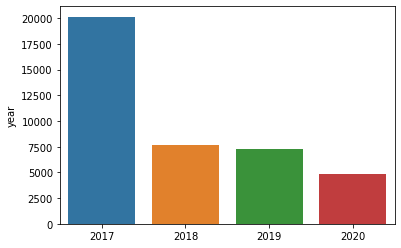

In [287]:
sns.barplot(
    x = list(set(df.year.values )),
    y = df.year.value_counts(),
    # hue=df.user.unique() WHY IS HUE NOT WORKING!!
)

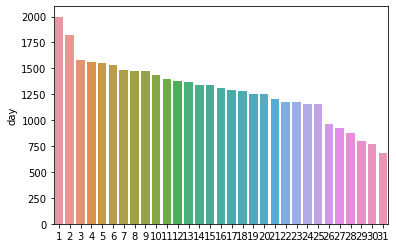

In [288]:
sns.barplot(
    x = list(set(df.day.values )),
    y = df.day.value_counts(),
    # hue=df.user.unique() WHY IS HUE NOT WORKING!!
)

In [300]:
plt.figure(figsize=(15,10))
sns.barplot(
    x=list(set(df.week.values )),
    y=df.week.value_counts(),
    hue= df.user.unique()
)

TypeError: 'str' object is not callable

<Figure size 1080x720 with 0 Axes>

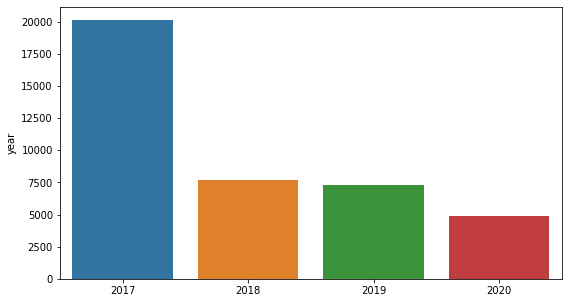

In [299]:
plt.figure(figsize=(9,5))
sns.barplot(
    x = list(set(df.year.values )),
    y = df.year.value_counts(),
    # hue=df.user.unique()
)

In [306]:
len(df.iloc[0].message)

39

### To do: make a column with the length of the message, make a column whether or not there is an emoji, make a column of answer time and then some charts on average answering time